In [1]:
import pandas as pd

df = pd.read_csv('train.csv')


In [24]:
df[df["lane_count"]==1]

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
9,TRAIN_0000009,20211208,수,2,1,103,일반국도16호선,0,0,50.0,...,0,양수장,33.361717,126.766958,없음,제2가시교,33.364336,126.769409,없음,52.0
10,TRAIN_0000010,20220623,목,11,1,103,일반국도99호선,0,0,60.0,...,0,노루생이,33.419423,126.491495,없음,노루생이삼거리,33.422672,126.492935,없음,47.0
11,TRAIN_0000011,20220724,일,2,1,107,중정로,0,0,50.0,...,0,선경오피스텔,33.248505,126.569797,없음,정방수퍼,33.248633,126.567766,없음,40.0
14,TRAIN_0000014,20220203,목,16,1,107,-,0,0,60.0,...,3,송목교,33.316913,126.624634,없음,송목교,33.317065,126.623867,없음,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701205,TRAIN_4701205,20220112,수,19,1,107,-,0,0,50.0,...,0,감귤창고,33.450215,126.920771,없음,수협,33.448689,126.916358,없음,23.0
4701209,TRAIN_4701209,20210909,목,10,1,103,일반국도11호선,0,0,60.0,...,3,윤고교,33.348305,126.614293,없음,윤고교,33.348691,126.614599,없음,48.0
4701210,TRAIN_4701210,20220105,수,14,1,107,관광단지로,0,0,30.0,...,0,산신주유소,33.255215,126.414236,없음,관광단지입구,33.258119,126.415840,없음,25.0
4701211,TRAIN_4701211,20211230,목,14,1,103,일반국도16호선,0,0,50.0,...,0,우사,33.358358,126.271652,없음,상명,33.359839,126.267783,없음,27.0


In [26]:
import matplotlib as mpl
mpl.rcParams['font.family']='NanumGothic'



<Figure size 1200x600 with 0 Axes>

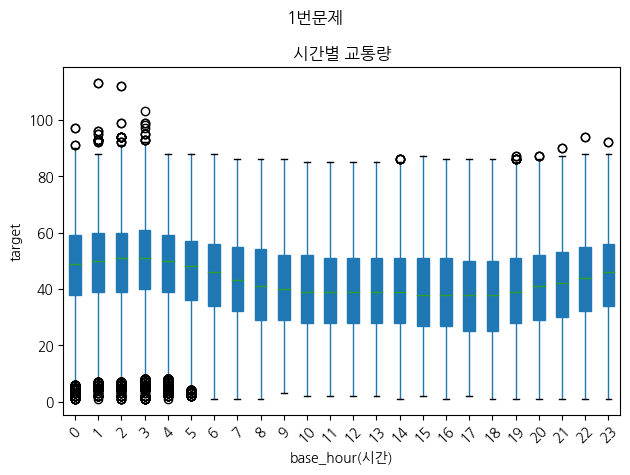

In [27]:
#------------1번----------------
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


df['base_hour'] = df['base_hour'].astype(int)


plt.figure(figsize=(12, 6))
df.boxplot(column='target', by='base_hour', grid=False, patch_artist=True)
plt.title('시간별 교통량')
plt.suptitle('1번문제')
plt.xlabel('base_hour(시간)')
plt.ylabel('target')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()



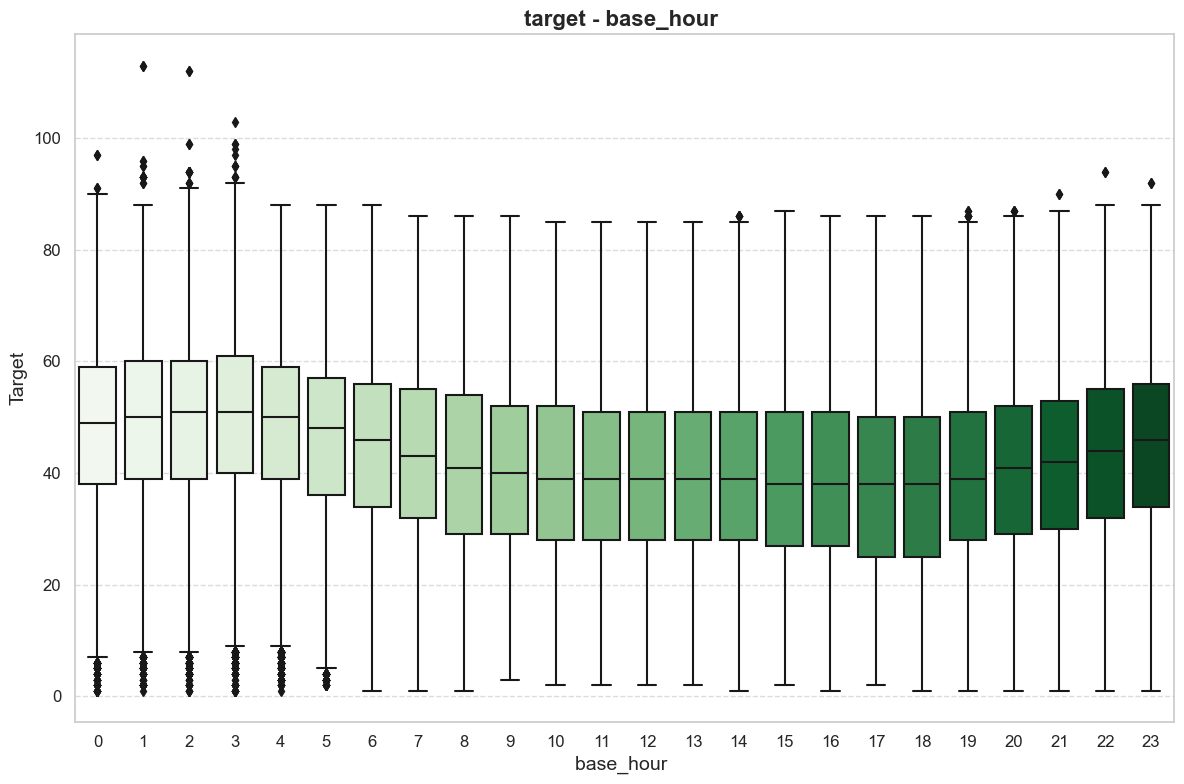

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 스타일 적용
sns.set(style="whitegrid")


plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='base_hour', y='target', palette='Greens')

# 타이틀과 레이블 추가
plt.title('target - base_hour ', fontsize=16, fontweight='bold')
plt.xlabel('base_hour ', fontsize=14)
plt.ylabel('Target', fontsize=14)

# 눈금과 레이블 스타일 조정
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 격자 추가
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [30]:
# Grouping by 'day_of_week' and calculating Q1, Q2, Q3
stats = df.groupby('day_of_week')['target'].quantile([0.25, 0.5, 0.75]).unstack()

# Renaming the columns for clarity
stats.columns = ['Q1', 'Median (Q2)', 'Q3']

# Printing the results

print(stats)


               Q1  Median (Q2)    Q3
day_of_week                         
월            30.0         43.0  54.0
화            30.0         43.0  54.0
수            30.0         43.0  54.0
목            30.0         43.0  54.0
금            30.0         42.0  54.0
토            31.0         43.0  54.0
일            31.0         43.0  54.0


In [31]:
print(df['day_of_week'].value_counts())

금    684024
수    675583
목    674070
일    673632
토    669767
화    662498
월    661643
Name: day_of_week, dtype: int64


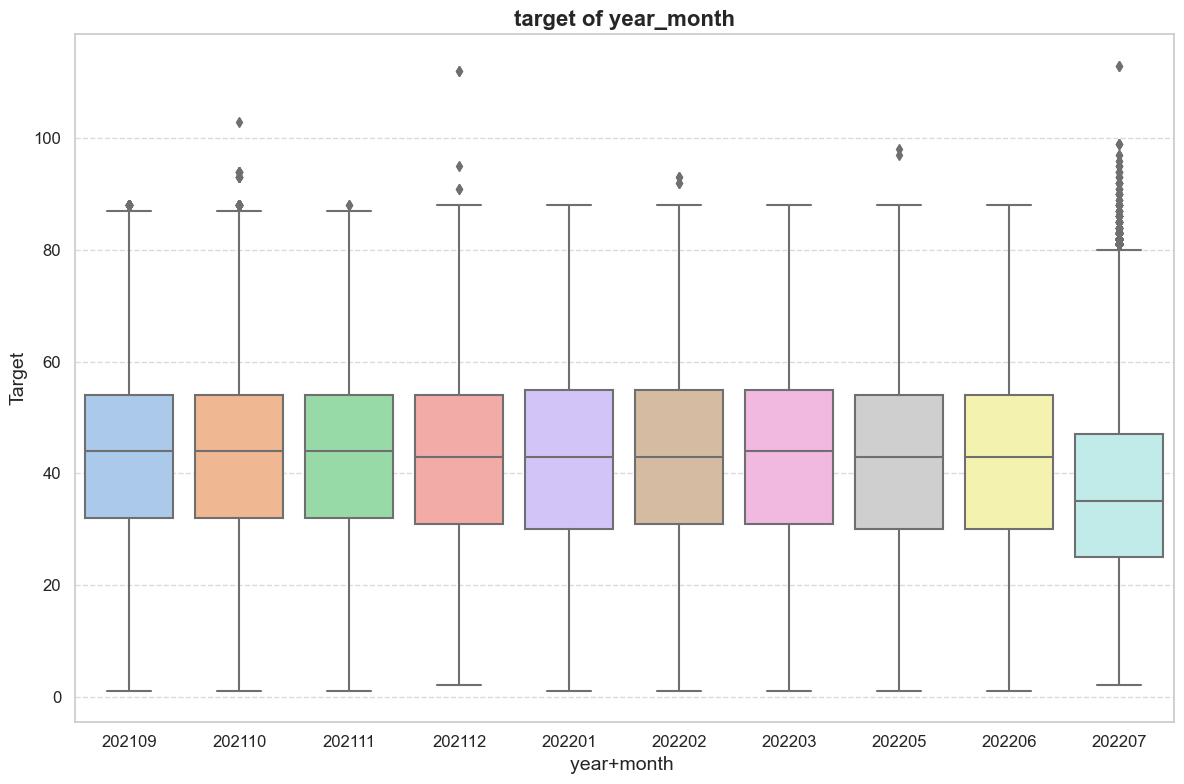

In [33]:
#--------------3번---------------
import matplotlib.pyplot as plt
import seaborn as sns
df['year_month'] = df['base_date'].astype(str).str[:6]

years_order=['202109', '202110', '202111', '202112', '202201', '202202', '202203', '202205', '202206', '202207']

df['year_month'] = pd.Categorical(df['year_month'], categories=years_order, ordered=True)
# Seaborn 스타일 적용
sns.set(style="whitegrid")

# Box plot 그리기
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='year_month', y='target', palette='pastel')

# 타이틀과 레이블 추가
plt.title('target of year_month', fontsize=16, fontweight='bold')
plt.xlabel('year+month ', fontsize=14)
plt.ylabel('Target', fontsize=14)

# 눈금과 레이블 스타일 조정
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 격자 추가
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


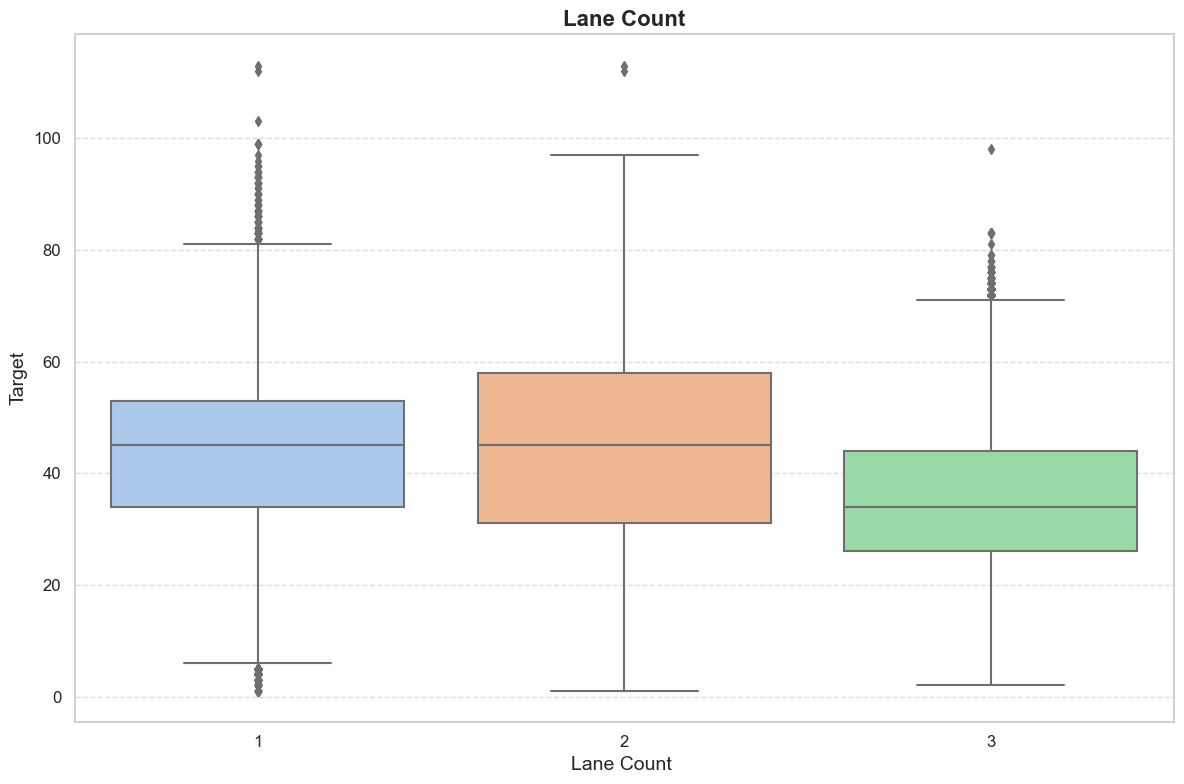

In [34]:
#--------------4번---------------
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='lane_count', y='target', palette='pastel')


plt.title('Lane Count', fontsize=16, fontweight='bold')
plt.xlabel('Lane Count ', fontsize=14)
plt.ylabel('Target', fontsize=14)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


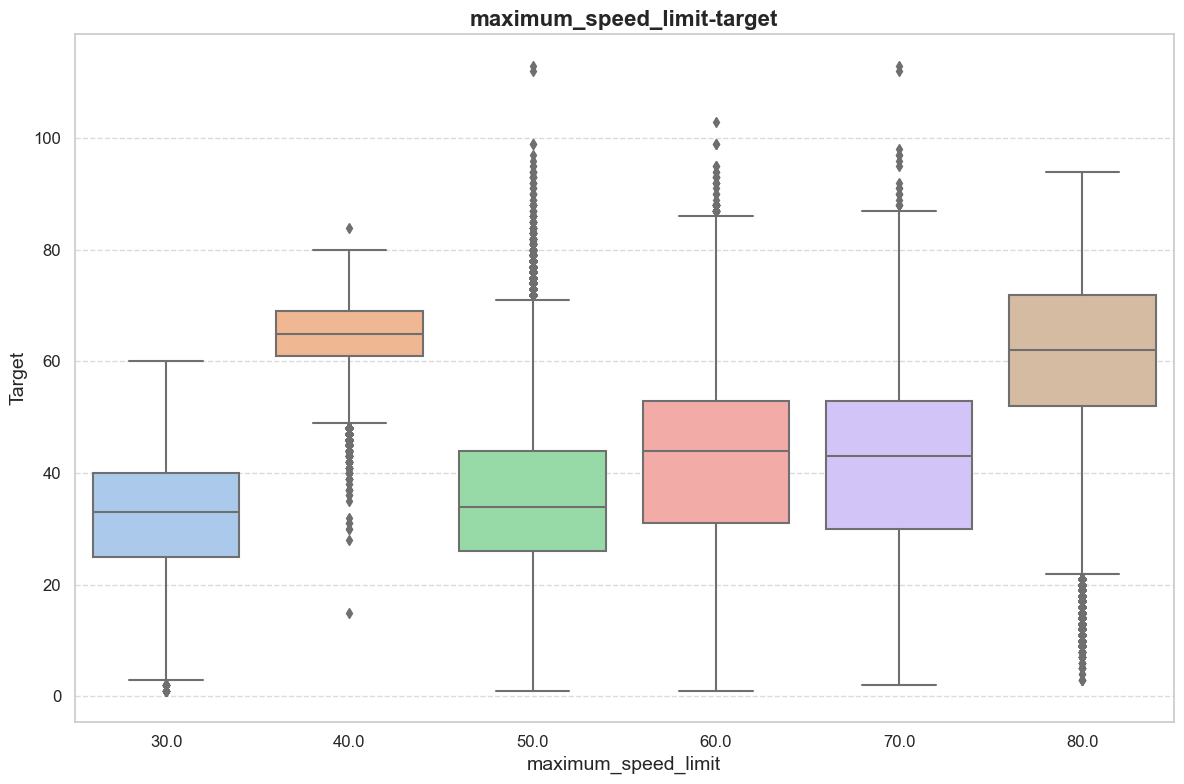

In [35]:
#--------------5번---------------
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='maximum_speed_limit', y='target', palette='pastel')


plt.title('maximum_speed_limit-target', fontsize=16, fontweight='bold')
plt.xlabel('maximum_speed_limit', fontsize=14)
plt.ylabel('Target', fontsize=14)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [39]:
filtered_df = df[df['maximum_speed_limit'] == 40]

# 도로명별 평균 차량 속도 계산
result = filtered_df.groupby('road_name')['target'].mean().reset_index()

# 컬럼 이름 변경 (보기 편하게)
result.rename(columns={'vehicle_speed': 'average_vehicle_speed'}, inplace=True)

# 결과 출력
print(result)

  road_name     target
0  일반국도12호선  66.903359
1  일반국도95호선  47.712526


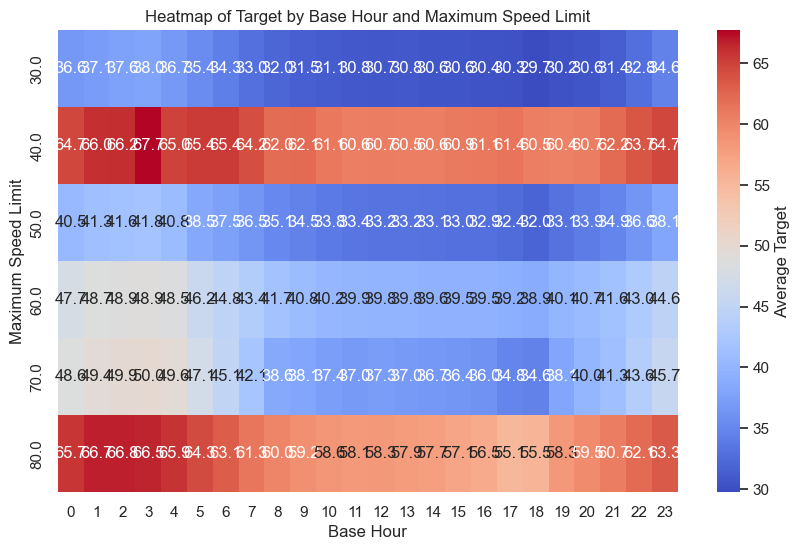

In [36]:
#----------------7번---------------------
import matplotlib.pyplot as plt
# Pivot table 생성: base_hour와 maximum_speed_limit로 그룹화 후 target의 평균 계산
heatmap_data = df.pivot_table(
    index='maximum_speed_limit',
    columns='base_hour',
    values='target',
    aggfunc='mean'
)

# 히트맵 그리기
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="coolwarm", cbar_kws={'label': 'Average Target'})

# 그래프 제목 및 라벨 설정
plt.title("Heatmap of Target by Base Hour and Maximum Speed Limit")
plt.xlabel("Base Hour")
plt.ylabel("Maximum Speed Limit")
plt.show()

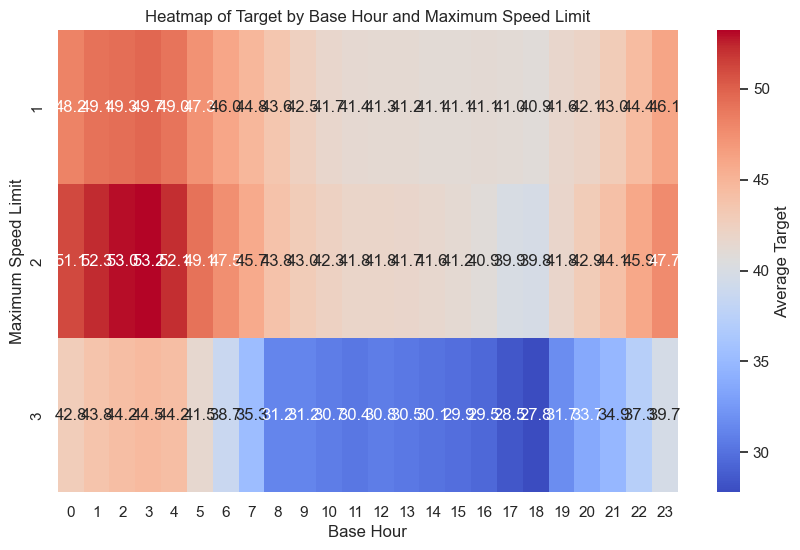

In [37]:
#----------------7번---------------------
import matplotlib.pyplot as plt
# Pivot table 생성: base_hour와 maximum_speed_limit로 그룹화 후 target의 평균 계산
heatmap_data = df.pivot_table(
    index='lane_count',
    columns='base_hour',
    values='target',
    aggfunc='mean'
)

# 히트맵 그리기
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="coolwarm", cbar_kws={'label': 'Average Target'})

# 그래프 제목 및 라벨 설정
plt.title("Heatmap of Target by Base Hour and Maximum Speed Limit")
plt.xlabel("Base Hour")
plt.ylabel("Maximum Speed Limit")
plt.show()